## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [1]:
name='Kolesnikov Egor' 
group='MFA 201' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)      <span      style="color: green">**DONE**</span>
    
    $1.2$ Check NAs (1 pt.)     <span      style="color: green">**DONE**</span>
    
    $1.3$ Transform dates (2 pt.)     <span      style="color: green">**DONE**</span>
    
    $1.4$. Make some plots (0.75 pt.)     <span      style="color: green">**DONE**</span>
    
    $1.5$ Split the data (0.75 pt.)     <span      style="color: green">**DONE**</span>
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)     <span      style="color: green">**DONE**</span>
    
    $2.2$ Point forecasts (1 pt.)     <span      style="color: green">**DONE**</span>
    
    $2.3$ Interval forecasts 1 (1 pt.)     <span      style="color: green">**DONE**</span>
    
    $2.4$ Interval forecasts 2 (1 pt.)     <span      style="color: green">**DONE**</span>
    
    $2.5$ Forecast quality metrics (2 pt.)     <span      style="color: green">**DONE**</span>
         
    $2.6$ Model comparison (1 pt.)     <span      style="color: green">**DONE**</span>
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [2]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [3]:
#code here (1 pt.)
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [14]:
# we use df.isna() to find missing values (if some value is missed, so "True")
df.isna() 

,sales,month,day,year
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
142,False,False,False,False
143,False,False,False,False
144,False,False,False,False
145,False,False,False,False


In [17]:
print(df.isna().value_counts())

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

0 values are missed

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [20]:
print(df.dtypes)

sales    float64
month      int64
day        int64
year       int64
dtype: object


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [23]:
!pip install datetime
from datetime import date, datetime

In [24]:
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [26]:
df.index = pd.to_datetime(df['date'])
print(df.index)

DatetimeIndex(['2020-10-31', '2020-07-31', '2020-04-30', '2020-01-31',
               '2019-10-31', '2019-07-31', '2019-04-30', '2019-01-31',
               '2018-10-31', '2018-07-31',
               ...
               '1986-07-31', '1986-04-30', '1986-01-31', '1985-10-31',
               '1985-07-31', '1985-04-30', '1985-01-31', '1984-10-31',
               '1984-07-31', '1984-04-30'],
              dtype='datetime64[ns]', name='date', length=147, freq=None)


What is the size of the dataset?

use ```.shape```

In [28]:
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [29]:
df=df.drop(['day', 'year','month','date'], axis=1)

What is the size of the dataset now?

In [30]:
df.shape

(147, 1)

### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [58]:
y = df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [59]:
y=np.flip(y)
print(y)

date
1984-04-30      1.235
1984-07-31      1.508
1984-10-31      1.584
1985-01-31      2.074
1985-04-30      1.656
               ...   
2019-10-31    127.990
2020-01-31    141.670
2020-04-30    134.620
2020-07-31    137.740
2020-10-31    134.710
Name: sales, Length: 147, dtype: float64


Plot the series using ```plot_series()```

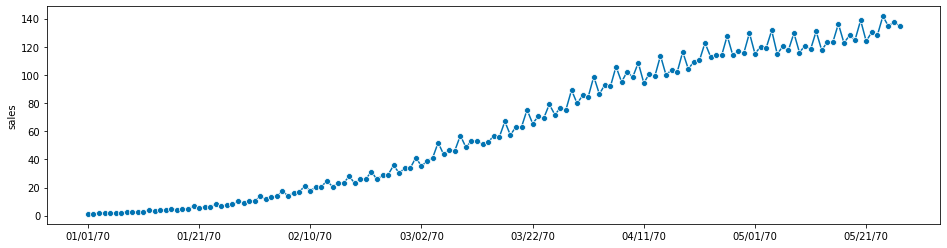

In [95]:
import matplotlib.pyplot as plt
import matplotlib
plot_series(y);
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%D"))

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [119]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

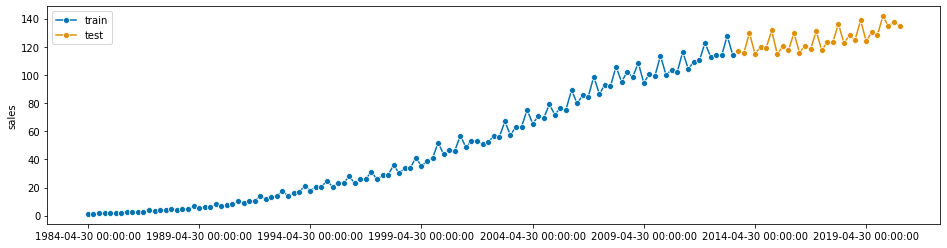

In [120]:
plot_series(y_train, y_test, labels=['train', 'test']);

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [147]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit()

C:\abaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [148]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit()

C:\abaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [149]:
fit_MAA.forecast(steps=30)

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725437
2014-04-30    117.901781
2014-07-31    121.230478
2014-10-31    120.746279
2015-01-31    134.107044
2015-04-30    121.283388
2015-07-31    124.612085
2015-10-31    124.127886
2016-01-31    137.488652
2016-04-30    124.664996
2016-07-31    127.993693
2016-10-31    127.509494
2017-01-31    140.870260
2017-04-30    128.046604
2017-07-31    131.375300
2017-10-31    130.891102
2018-01-31    144.251867
2018-04-30    131.428211
2018-07-31    134.756908
2018-10-31    134.272709
2019-01-31    147.633475
2019-04-30    134.809819
2019-07-31    138.138516
2019-10-31    137.654317
2020-01-31    151.015083
2020-04-30    138.191426
2020-07-31    141.520123
2020-10-31    141.035924
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [150]:
fit_AAM.forecast(steps=30)

2013-07-31    119.244420
2013-10-31    117.867086
2014-01-31    133.457370
2014-04-30    118.815370
2014-07-31    124.107313
2014-10-31    122.625299
2015-01-31    138.791122
2015-04-30    123.516964
2015-07-31    128.970205
2015-10-31    127.383511
2016-01-31    144.124873
2016-04-30    128.218558
2016-07-31    133.833098
2016-10-31    132.141724
2017-01-31    149.458625
2017-04-30    132.920152
2017-07-31    138.695990
2017-10-31    136.899936
2018-01-31    154.792376
2018-04-30    137.621746
2018-07-31    143.558882
2018-10-31    141.658149
2019-01-31    160.126128
2019-04-30    142.323340
2019-07-31    148.421775
2019-10-31    146.416362
2020-01-31    165.459879
2020-04-30    147.024934
2020-07-31    153.284667
2020-10-31    151.174574
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

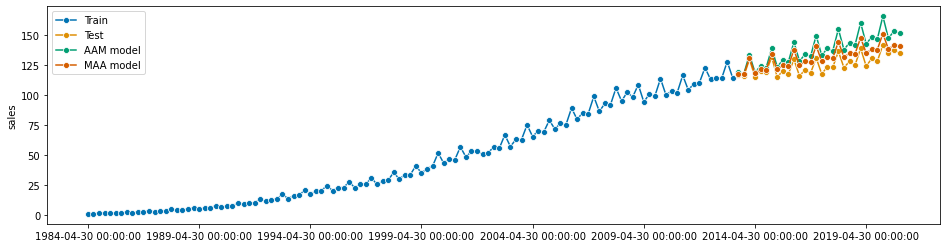

In [151]:
y_pred1 = fit_AAM.forecast(steps=30)
y_pred2 = fit_MAA.forecast(steps=30)

plot_series(y_train, y_test, y_pred1, y_pred2, labels=['Train', 'Test', 'AAM model', 'MAA model'])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

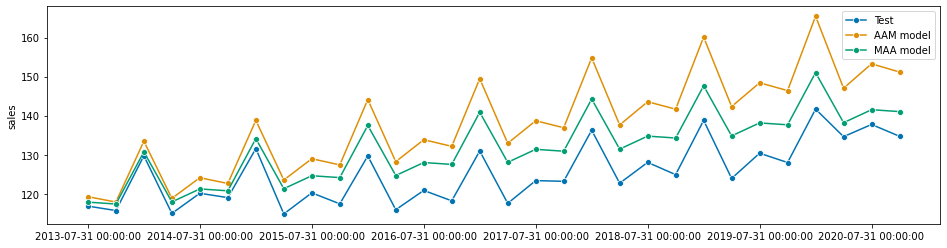

In [153]:
plot_series(y_test, y_pred1, y_pred2, labels=['Test', 'AAM model', 'MAA model'])

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [177]:
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
df_MAA=pred_MAA.summary_frame(alpha=0.05)
df_MAA = df_MAA.rename(columns={'pi_lower': 'lower_int', 'pi_upper': 'upper_int'})
df_MAA

,mean,mean_numerical,lower_int,upper_int
2013-07-31,117.848870,117.705074,107.735137,127.534253
2013-10-31,117.364671,117.337341,106.386027,128.928195
2014-01-31,130.725437,130.763066,117.887828,144.511963
2014-04-30,117.901781,118.032985,103.358684,133.093461
2014-07-31,121.230478,121.497114,101.305720,141.804978
2014-10-31,120.746279,121.006920,98.899451,145.815412
2015-01-31,134.107044,134.685863,108.835016,164.637301
2015-04-30,121.283388,121.696968,94.284019,154.932834
2015-07-31,124.612085,125.029985,91.808842,165.166101
2015-10-31,124.127886,124.780695,89.391118,167.516899


In [179]:
print("Lowest meaning in the table = " + str(8.197633), ", while the highest meaning = " + str(320.933150))

Lowest meaning in the table = 8.197633 , while the highest meaning = 320.93315


Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

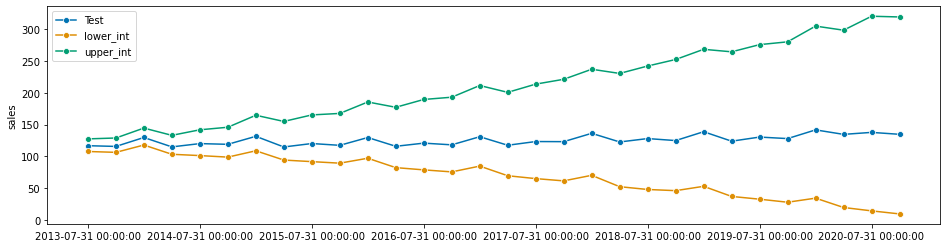

In [198]:
lower_int0 = df_MAA['lower_int']
upper_int0 = df_MAA['upper_int']

plot_series(y_test, lower_int0, upper_int0, labels=['Test', 'lower_int', 'upper_int'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [155]:
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
df_AAM=pred_AAM.summary_frame(alpha=0.05)
df_AAM = df_AAM.rename(columns={'pi_lower': 'lower_int', 'pi_upper': 'upper_int'})
df_AAM

,mean,mean_numerical,lower_int,upper_int
2013-07-31,119.244420,119.336734,115.789361,122.878231
2013-10-31,117.867086,117.932396,113.649435,122.330554
2014-01-31,133.457370,133.516741,128.585339,138.603267
2014-04-30,118.815370,118.951062,113.247153,124.288446
2014-07-31,124.107313,124.238978,118.230042,130.790550
2014-10-31,122.625299,122.738696,115.877945,129.847742
2015-01-31,138.791122,138.889612,130.918274,147.134635
2015-04-30,123.516964,123.619260,115.360601,131.374296
2015-07-31,128.970205,129.116374,119.929925,137.846589
2015-10-31,127.383511,127.452573,117.929042,136.911171


In [180]:
print("Lowest meaning in the table = " + str(113.247153), ", while the highest meaning = " + str(189.220876))

Lowest meaning in the table = 113.247153 , while the highest meaning = 189.220876


Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

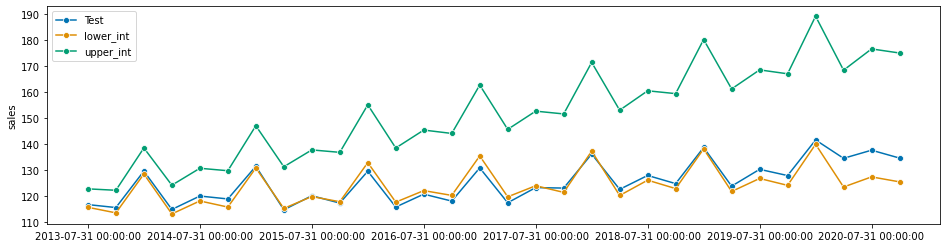

In [197]:
lower_int = df_AAM['lower_int']
upper_int = df_AAM['upper_int']

plot_series(y_test, lower_int, upper_int, labels=['Test', 'lower_int', 'upper_int'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [188]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=6c0cee768f682347116c96d39054503e5a7d66acce71c94096598ee31c9ca736
  Stored in directory: c:\users\егор\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [269]:
# MAE for ETS(MAA) predictions
import sklearn.metrics as skmet
skmet.mean_absolute_error(y_test, y_pred2)

6.394546567403895

In [270]:
# MAE for ETS(AAM) predictions
import sklearn.metrics as skmet
skmet.mean_absolute_error(y_test, y_pred1)

12.709147584469212

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [272]:
# MSE for ETS(MAA) predictions
import sklearn.metrics as skmet
skmet.mean_squared_error(y_test, y_pred2)

50.57147029554047

In [271]:
# MSE for ETS(AAM) predictions
import sklearn.metrics as skmet
skmet.mean_squared_error(y_test, y_pred1)

195.96973859049746

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [ ]:
#a new function to calculate MAPE
Error = np.sum(np.abs(np.subtract(y_test,y_pred)))
Average = np.sum(y_test)
MAPE = Error/Average
print(MAPE)

***Calculate MAPE:***

In [278]:
# MAPE for ETS(AAM) predictions
import numpy as np
def mean_absolute_percentage_error(y_test, y_predd): 
    return np.mean(np.abs((y_test - y_predd) / y_test)) * 100

# difficult way of calculating MAPE
Error1 = np.sum(np.abs(np.subtract(y_test,y_pred1)))
Average1 = np.sum(y_test)
MAPE1 = Error1/Average1*100
print(MAPE1)

# common way of calculating MAPE
print(mean_absolute_percentage_error(y_test, y_pred1))

10.135802479067124
9.99351293519372


In [283]:
# MAPE for ETS(MAA) predictions

# difficult way of calculating MAPE
Error2 = np.sum(np.abs(np.subtract(y_test,y_pred2)))
Average2 = np.sum(y_test)
MAPE2 = Error2/Average2*100
print(MAPE2)

# common way of calculating MAPE
print(mean_absolute_percentage_error(y_test, y_pred2))

5.099780336928825
5.091700990450361


### 2.6 What is the best model according to the metrics above? (1 pt.)

In [301]:
# MODEL AAM - "1", MODEL MAA - "2" 
mae1 = float(skmet.mean_absolute_error(y_test, y_pred1))
mae2 = float(skmet.mean_absolute_error(y_test, y_pred2))
mse1 = float(skmet.mean_squared_error(y_test, y_pred1))
mse2 = float(skmet.mean_squared_error(y_test, y_pred2))
mape1 = float(mean_absolute_percentage_error(y_test, y_pred1))
mape2 = float(mean_absolute_percentage_error(y_test, y_pred2))

#Compare models according to understanding that smaller error is better for model's quality
if mae1>mae2:
    print("MAA model is better according to MAE metric")
else:
    print("AAM model is better according to MAE metric")
    
if mse1>mse2:
    print("MAA model is better according to MSE metric")
else:
    print("AAM model is better according to MSE metric")
    
if mape1>mape2:
    print("MAA model is better according to MAPE metric")
else:
    print("AAM model is better according to MAPE metric")

MAA model is better according to MAE metric
MAA model is better according to MSE metric
MAA model is better according to MAPE metric
